In [14]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from env.mdp import MarkovDecisionProcess,Sampler
from env.gridworld import Gridworld, gridplot
from env.complete import Complete
from algs.lps import unregCMDPLP
from typing import List, Tuple
Point = Tuple[int,int]
Goal = Tuple[Point,float]

### Solving unregularized CMDPS with the LP formulation

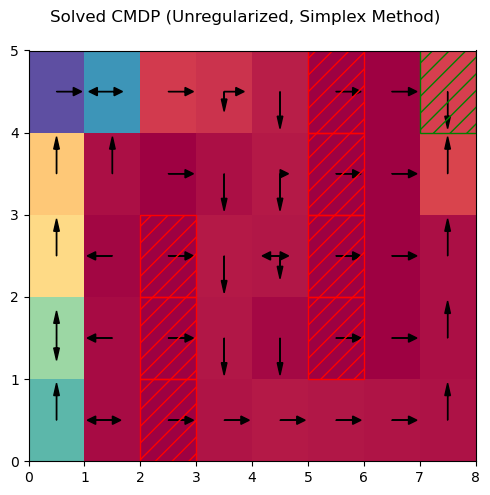

In [65]:
goals = [((7,4),100)]
obstacles = [(2,0),(2,1),(2,2),(5,1),(5,2),(5,3),(5,4)]
gridMDP = Gridworld(8,5,0.1,0.9,goals=goals,obstacles=obstacles) #build a "wall of obstacles"
gridMDP.Psi = gridMDP.Psi*1000
solver = unregCMDPLP(gridMDP)
mu = solver.solve()
sz = 5.
mu_s = np.sum(mu,axis=1)
fig, ax = plt.subplots(1,1,figsize=(sz,sz))
plot = np.average(gridMDP.states2grid(mu),axis=2)
gridplot(gridMDP,ax,mu_s,stochastic_policy=solver.recover_stochastic_policy(),obstacles=obstacles,goals=goals)
fig.suptitle('Solved CMDP (Unregularized, Simplex Method)')
fig.tight_layout()

[((0, 0), 2, 0), ((0, 1), 2, 0.0), ((0, 2), 2, 0.0), ((0, 3), 2, 0.0), ((0, 4), 0, 0.0), ((1, 4), 1, 0.0), ((0, 4), 0, 0.0), ((1, 4), 1, 0.0), ((0, 4), 0, 0.0), ((1, 4), 1, 0.0), ((2, 4), 0, 0.0), ((3, 4), 0, 0.0), ((4, 4), 3, 0.0), ((4, 3), 3, 0.0), ((4, 2), 3, 0.0), ((4, 1), 3, 0.0), ((4, 2), 1, 0.0), ((3, 2), 3, 0.0), ((3, 1), 3, 0.0), ((3, 0), 0, 0.0), ((4, 0), 0, 0.0), ((5, 0), 0, 0.0), ((6, 0), 0, 0.0), ((7, 0), 2, 0.0), ((7, 1), 2, 0.0), ((7, 2), 2, 0.0), ((7, 3), 2, 0.0), ((7, 4), 3, 0.0), ((7, 3), 2, 100.0), ((6, 3), 0, 0.0), ((7, 3), 2, 0.0), ((7, 4), 3, 0.0), ((7, 3), 2, 100.0), ((7, 4), 3, 0.0), ((7, 3), 2, 100.0), ((7, 4), 3, 0.0), ((7, 3), 2, 100.0), ((7, 2), 2, 0.0), ((7, 3), 2, 0.0), ((7, 3), 2, 0.0), ((7, 2), 2, 0.0), ((7, 3), 2, 0.0), ((7, 4), 3, 0.0), ((7, 4), 3, 100.0), ((7, 3), 2, 100.0), ((6, 3), 0, 0.0), ((7, 3), 2, 0.0), ((7, 4), 3, 0.0), ((7, 3), 2, 100.0), ((7, 4), 3, 0.0), ((7, 3), 2, 100.0), ((7, 4), 3, 0.0), ((7, 3), 2, 100.0), ((7, 4), 3, 0.0), ((7, 3), 2,

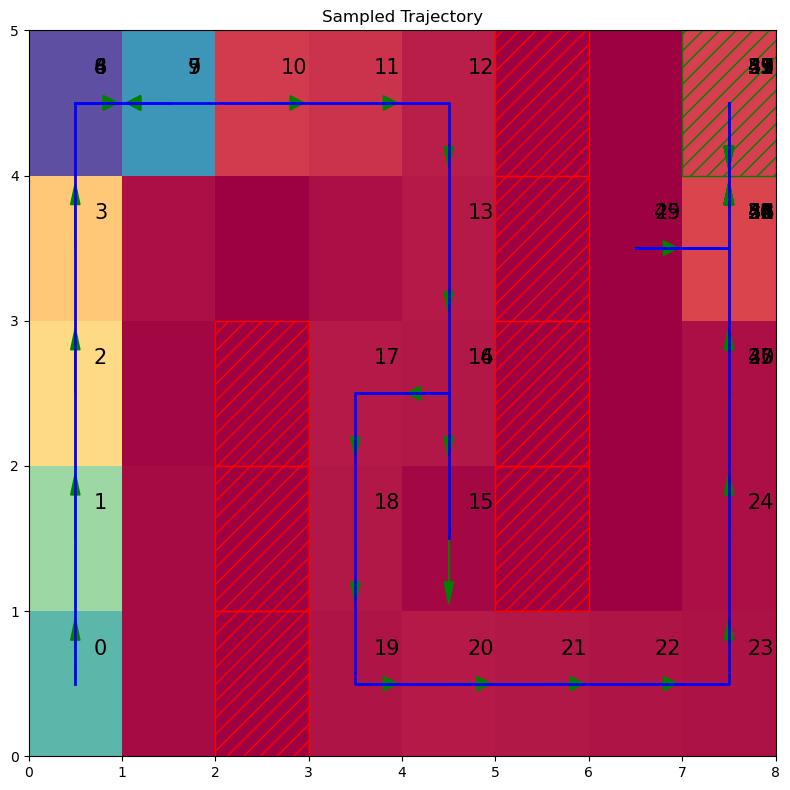

In [66]:
smp = Sampler(gridMDP)

""" Get the initial state """
traj = []
r_t = 0
s_t = smp.reset()
for i in range(60):
    a_t = rd.choice(np.arange(4), p = solver.recover_stochastic_policy()[s_t]) 
    traj += [(gridMDP.state2point(s_t),a_t,r_t)]
    s_t, r_t = smp.step(a_t)

traj


print(traj)
fig, ax = plt.subplots(1,1,figsize=(8,8))
gridplot(gridMDP, ax, scalar=mu_s, traj=traj, goals=goals, obstacles=obstacles)
ax.set_title('Sampled Trajectory')
fig.tight_layout()
plt.show()

### Constrained Bandits

In [67]:
n = 4
constraints = [
    [0,0.2,0.,0],]
def cost_matrix(a,c):
    return c[a]
b = np.ones((len(constraints)))*2.0
Psi = np.array(  
        [[[ cost_matrix(a,c) 
            for _  in range(1)             ] 
            for a  in range(n)             ] 
            for c  in constraints         ],dtype=np.float64) * 0.2

Bandit = Complete(1,n,1.,b=b,Psi=Psi) # Bandits are just one state MDPs